In [1]:
import nltk
import pandas as pd
import seaborn as sns

from nltk import tokenize
from matplotlib import pyplot as plt

In [2]:

stopwords = [
    'the','and','to','of','was','with','on','in','for','no','name',
    'is','he','or','at','as','one','she','am','you','his',
    'your','were','by','pt','not','her','be','this','are','there',
    'had','date','from','first','an','that','have','but','has','please','which',
    'namepattern','seen','every','fax', 'home', 'telephone', 'given', 'after', 
    'also','will', 'un', 'up', 'well', 'time', 'any']
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity, stopwords):
    all_words = ' '.join([text for text in text[column_text].astype('str')])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase) 
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    df_frequency = df_frequency[~df_frequency['Word'].isin(stopwords)].reset_index()
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", palette="deep")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='horizontal')
    plt.show()

def normalize(text):
    text = text.str.lower()
    text = text.str.replace(r'[^A-Za-z0-9]+', ' ', regex=True)
    text = text.str.replace('\s{2,}', ' ', regex=False)
    return text


In [3]:
df = pd.read_csv('../data/raw/news.csv')
df['label'] = (df['label'] == 'FAKE').astype('int')
df['titletext'] = df['title'] + ". " + df['text']
df = df.reindex(columns=['label', 'titletext'])
df['titletext'] = normalize(df['titletext'])
df

,label,titletext
0,1,you can smell hillary s fear daniel greenfield...
1,1,watch the exact moment paul ryan committed pol...
2,0,kerry to go to paris in gesture of sympathy u ...
3,1,bernie supporters on twitter erupt in anger ag...
4,0,the battle of new york why this primary matter...
...,...,...
6330,0,state department says it can t find emails fro...
6331,1,the p in pbs should stand for plutocratic or p...
6332,1,anti trump protesters are tools of the oligarc...
6333,0,in ethiopia obama seeks progress on peace secu...


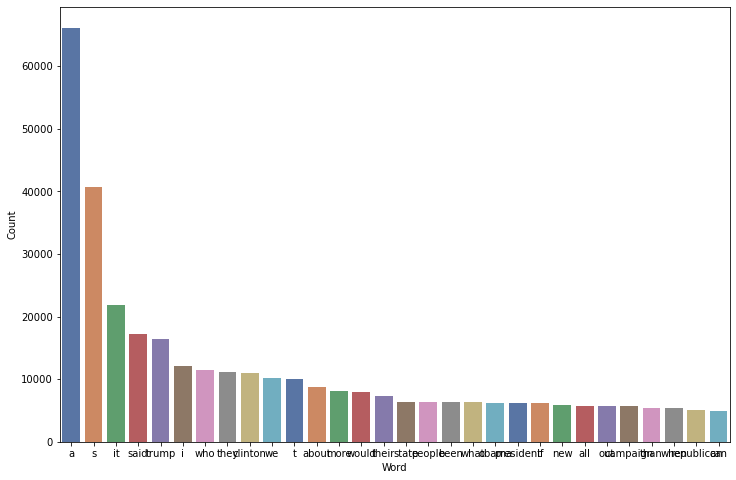

In [17]:
counter(df[df['label'] == 0], 'titletext', 30, stopwords)

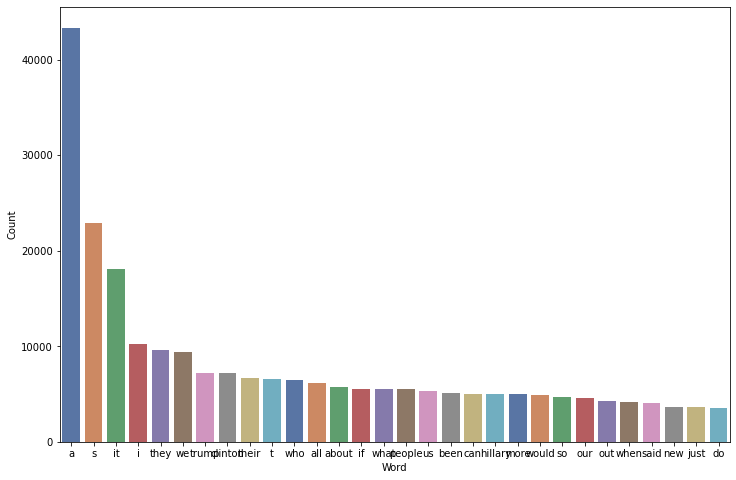

In [4]:
counter(df[df['label'] == 1], 'titletext', 30, stopwords)